<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/data_processing/lessons/grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRID from LiDAR data



In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

Let's download the ASCII XYZ LiDAR file from GitHub and load the coordinates into numpy array

In [5]:
!wget -q -O sample_data/lidar.txt https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/english/data_processing/lessons/code/lidar.txt

In [20]:
xyz = np.loadtxt('sample_data/lidar.txt', delimiter=',')
x = xyz[:,0]    # vector of x coordinates
y = xyz[:,1]    # vector of y coordinates
z = xyz[:,2]    # vector of z coordinates
print(f"Number of points: {x.shape[0]}")
print("Bounding box:")
print(f"min: {x.min():10.2f}, {y.min():10.2f}, {z.min():8.2f}")
print(f"max: {x.max():10.2f}, {y.max():10.2f}, {z.max():8.2f}")

Number of points: 51150
Bounding box:
min:  548025.89, 5128996.49,   933.31
max:  550424.10, 5129293.08,  1139.11


Let's have a top view of the points.

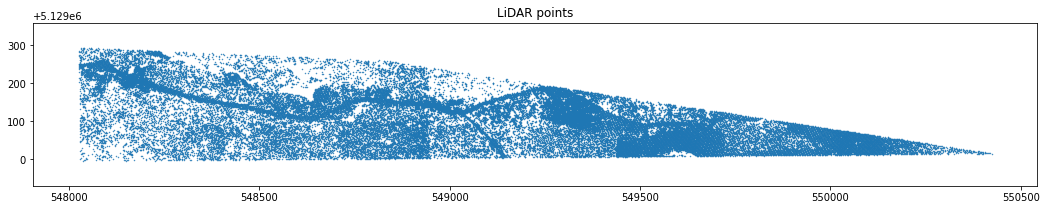

In [29]:
plt.figure(figsize=(18,3))
plt.scatter(x, y, s=0.2)
plt.axis('equal')
_ = plt.title('LiDAR points')

Let's set up some parameters for the grid to generate. You can customize these values

In [33]:
step = 10           # distance between grid points
xmin = 548040.0     # limits for study area
ymin = 5129010.0
zmin = 930
xmax = 548300.0
ymax = 5129270.0
zmax = 1140
dz = 10             # contour line interval

Let's interpolate a grid from the scatterd data.

In [31]:
xx = np.arange(xmin, xmax+step, step)   # x grid coordinates
yy = np.arange(ymin, ymax+step, step)   # y grid coordinates
xi, yi = np.meshgrid(xx, yy)            # generate 2D grid x and y coordinates
zi = griddata((x, y), z, (xi, yi), method='linear') # interpolate elevations at grid points, nearest and cubic are other available methods

Let's display contour lines

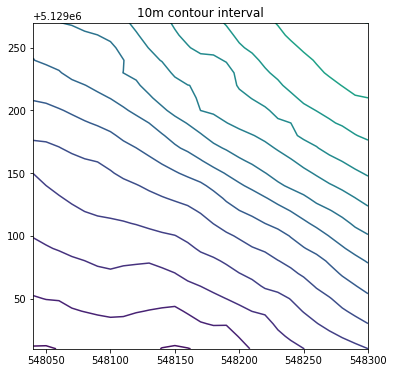

In [36]:
plt.figure(figsize=(6, 6))
plt.contour(xi,yi,zi,np.arange(zmin,zmax+dz, dz))
_ = plt.title(str(dz) + "m contour interval")

Let's calculate the volume above 1000 metres in the grid model.

In [37]:
vol = sum(zi[zi > 1000] - 1000) * step**2
print(f'Volume above 1000 m: {vol:.0f} m3')

Volume above 1000 m: 767608 m3
